In [32]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [9]:
df=pd.read_csv('covid_19_india.csv',parse_dates=['Date'],dayfirst=True)

In [21]:
df.head(3)

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2


In [16]:
# keeping only required columns:
df=df[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]

In [20]:
# renaming the column names:
df.columns = ['date','state','cured','deaths','confirmed']
df.head(2)

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1


In [22]:
# looking at the latest datasets:
df.tail(5)

,date,state,cured,deaths,confirmed
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999


In [24]:
# taking only last date data set:
today=df[df.date=='2021-08-11']

## #sorting data wrt number of confirmed cases:

In [52]:
max_confirmed_cases=today.sort_values(by='confirmed',ascending=False)
max_confirmed_cases.head(5)

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


In [29]:
# taking only top states data:
top_states_confirmed=max_confirmed_cases[0:5]

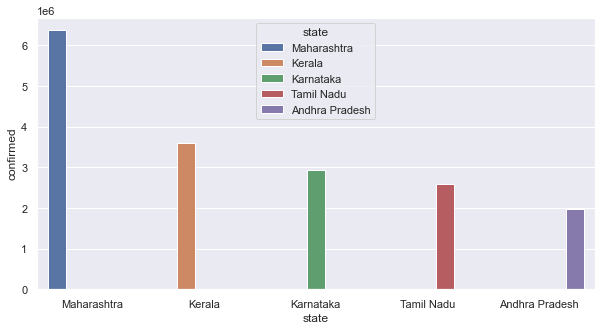

In [37]:
# making bar-plot for top 5 confirmed states
sns.set(rc={'figure.figsize':(10,5)})  # see carefully its a dictionary
sns.barplot(x='state',y='confirmed',data=top_states_confirmed,hue='state')
plt.show()

## #sort wrt number of death cases:

In [51]:
max_death_cases = today.sort_values(by='deaths',ascending=False)

In [44]:
top_states_death=max_death_cases[0:5]

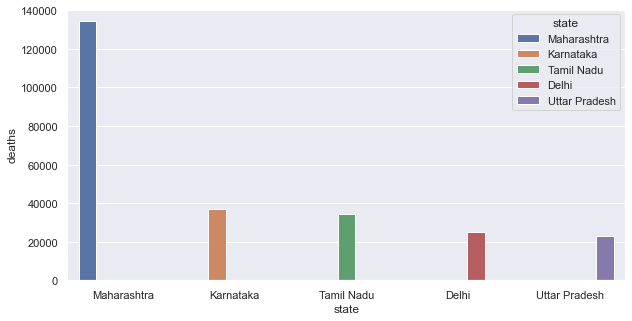

In [68]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='state',y='deaths',data=top_states_death,hue='state')
plt.show()

## #sort wrt number of cured cases:

In [48]:
max_cured_cases = today.sort_values(by='cured',ascending=False)

In [49]:
top_states_cured=max_cured_cases[0:5]

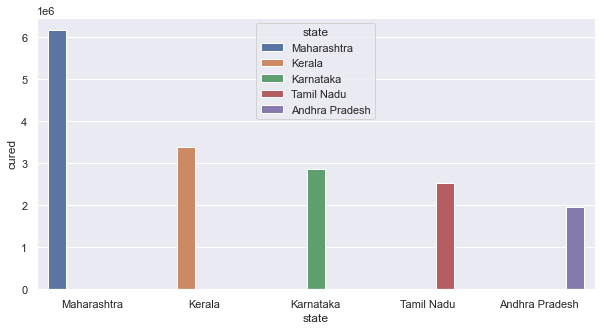

In [69]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='state',y='cured',data=top_states_cured,hue='state')
plt.show()

### Lets talk about Maharastra:

In [67]:
maha=df[df['state']=='Maharashtra']

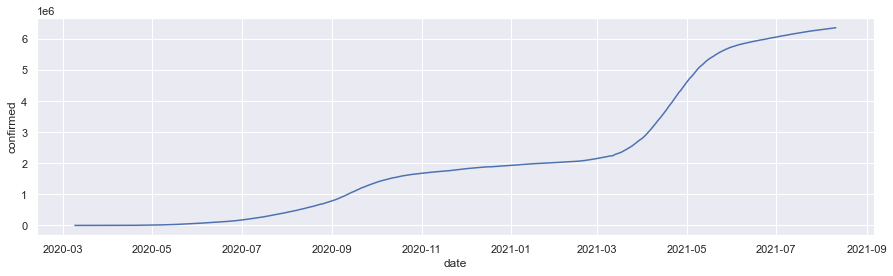

In [74]:
# Confirmed cases in maharashtra
sns.set(rc={'figure.figsize':(15,4)})
sns.lineplot(x='date',y='confirmed',data=maha)
plt.show()

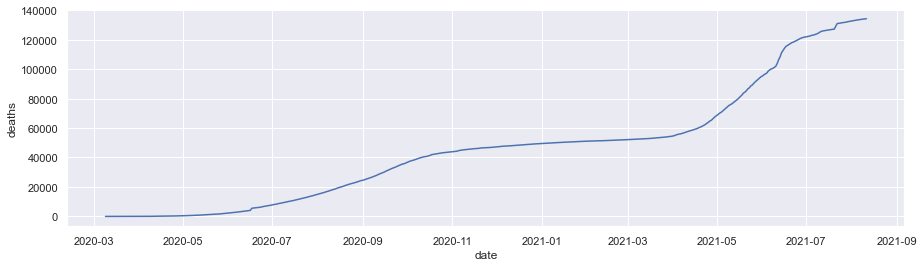

In [75]:
# death cases in maharashtra
sns.set(rc={'figure.figsize':(15,4)})
sns.lineplot(x='date',y='deaths',data=maha)
plt.show()

# Linear regression model implementation:

In [98]:
from sklearn.model_selection import train_test_split

In [103]:
maha=df[df['state']=='Maharashtra']

In [104]:
# converting date-time to ordinal
maha['date']=maha['date'].map(dt.datetime.toordinal)
maha.head()

<ipython-input-104-eb7a615a571b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha['date']=maha['date'].map(dt.datetime.toordinal)


,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [105]:
x=maha['date']
y=maha['confirmed']

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lr=LinearRegression()

In [109]:
y_train

10138    1935636
6580     1242770
1368        8068
1496       10498
4515      366368
          ...   
10966    2009106
17374    6237755
8505     1749777
2505       65168
15970    5898550
Name: confirmed, Length: 364, dtype: int64

In [110]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [111]:
maha.tail(3)

,date,state,cured,deaths,confirmed
18022,738011,Maharashtra,6144388,133996,6353328
18058,738012,Maharashtra,6151956,134064,6357833
18094,738013,Maharashtra,6159676,134201,6363442


In [112]:
lr.predict(np.array([['738014']]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([[5600300.52876282]])